# VALLARIT, Marick Andrei T.
2ECE-C
Exploratory Data Analysis on Spotify 2023 Dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overview of the Dataset

In [14]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1') # Change encoding to latin-1 so we can call the csv
spotify_2023 = pd.DataFrame(df,columns=['track_name','artist(s)_name','artist_count','released_year','released_month','released_day',
                                     'in_spotify_playlists','in_spotify_charts','streams','in_apple_playlists','in_apple_charts',
                                     'in_deezer_playlists','in_deezer_charts,in_shazam_charts','bpm','key','mode','danceability_%',
                                     'valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']) # Arrange the columns
spotify_2023

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [20]:
missing_values = spotify_2023.isnull().sum()
print(missing_values[missing_values > 0])

in_deezer_charts,in_shazam_charts    953
key                                   95
dtype: int64


# Basic Descriptive Statistics

### Mean, Median, and Standard Deviation

In [54]:
spotify_2023['streams'] = pd.to_numeric(spotify_2023['streams'], errors='coerce') # Convert the non-numbers to numbers since without this function we cannot call

streams_mean = spotify_2023['streams'].mean() # get the mean of the streams column
streams_median = spotify_2023['streams'].median() # get the median of the streams column
streams_std = spotify_2023['streams'].std() # get the std of the streams column

print('The mean of the streams column is:', streams_mean) 
print('The median of the streams column is:', streams_median)
print('The standard deviation of the streams column is:', streams_std)

The mean of the streams column is: 514137424.93907565
The median of the streams column is: 290530915.0
The standard deviation of the streams column is: 566856949.0388832


### Distribution of released_year and artist_count

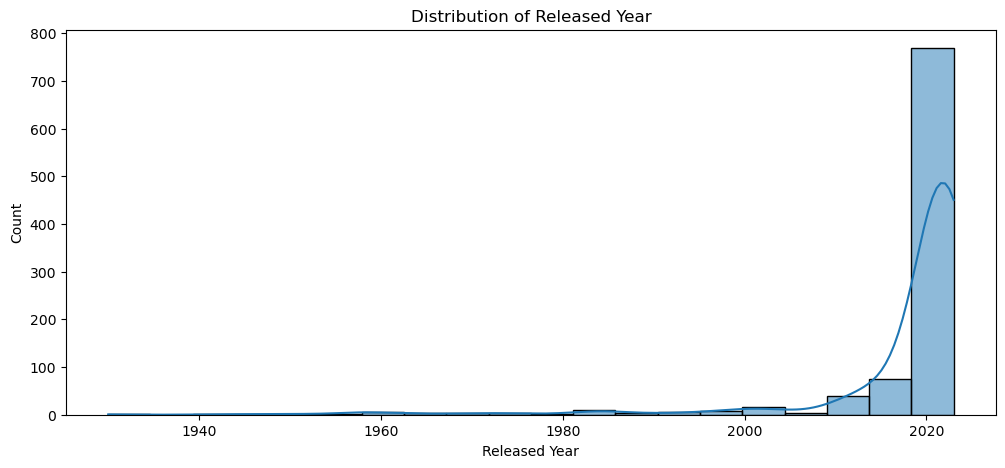

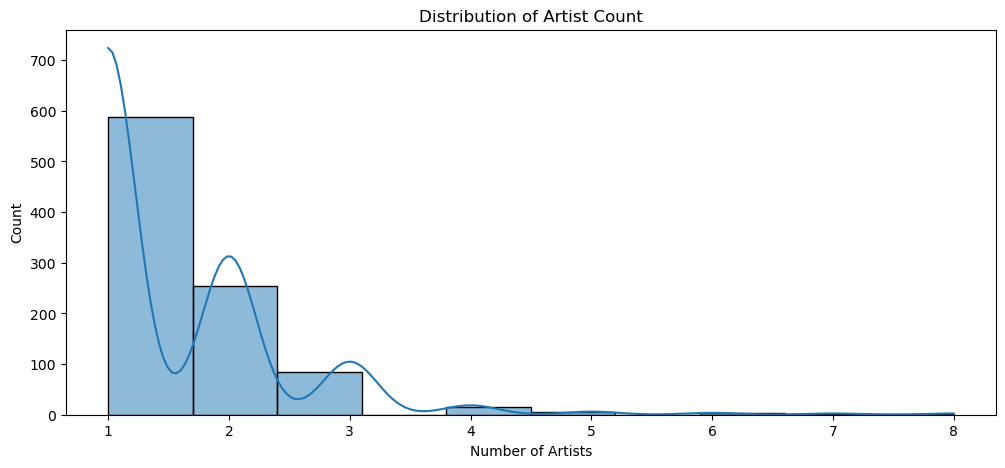

In [74]:
# Distribution of 'released_year'
plt.figure(figsize=(12, 5))
sns.histplot(spotify_2023['released_year'], bins=20, kde=True)
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Count')
plt.show()

# Distribution of 'artist_count'
plt.figure(figsize=(12, 5))
sns.histplot(spotify_2023['artist_count'], bins=10, kde=True)
plt.title('Distribution of Artist Count')
plt.xlabel('Number of Artists')
plt.ylabel('Count')
plt.show()

#### Explanation (Distribution of Released Year)
For the distribution of the released year, the outliers here can be the fact that back in the 20th century, before the popularization of digital streaming services, there weren't any means of acquiring music tracks through the use of the internet or digitally, only through physical means such as vinyl, cd, radios, television, and other forms of medium for music before the 21st century. Compared to newer releases of music, they have become more popular since they are much more accessible through online means, such as through digital streaming services or platforms, as seen in the abrupt rise of music in 2020.

#### Explanation (Distribution of Artist Count)
The distribution of the artist count above indicates the number of artists that produced music, we can see the trend that single artists made more distributions than collaborating artists, meaning the outliers here are the few tracks with a high number of artists producing in those tracks indicate that it may be special projects or collaborations.


# Top Performers
### Top 5 Most Streamed Tracks

In [102]:
top_5_streamed_tracks = spotify_2023[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(5) # Show only the track name, artist/s name/s, and the streams to make it minimal
top_5_streamed_tracks

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


### Top 5 Most Frequent Artists based on the number of tracks

In [129]:
top_5_frequent_artists = spotify_2023[['artist(s)_name']].value_counts().head(5) # Get the value count of the artists that are frequent in the dataset

top_5_artists = top_5_frequent_artists.reset_index() # reset the index

top_5_artists.columns = ['artist(s)_name', 'count'] # add a column that indicates the number of times the artists have appeared in the dataset

top_5_artists 

,artist(s)_name,count
0,Taylor Swift,34
1,The Weeknd,22
2,SZA,19
3,Bad Bunny,19
4,Harry Styles,17


# Temporal Trends

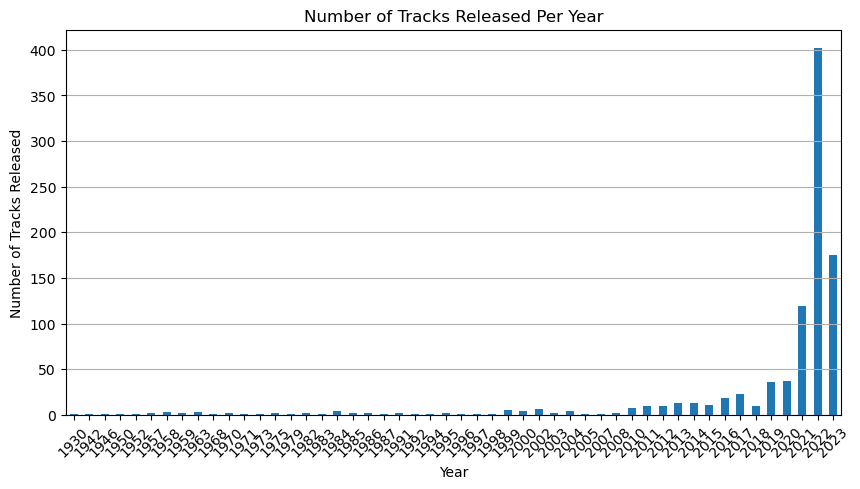

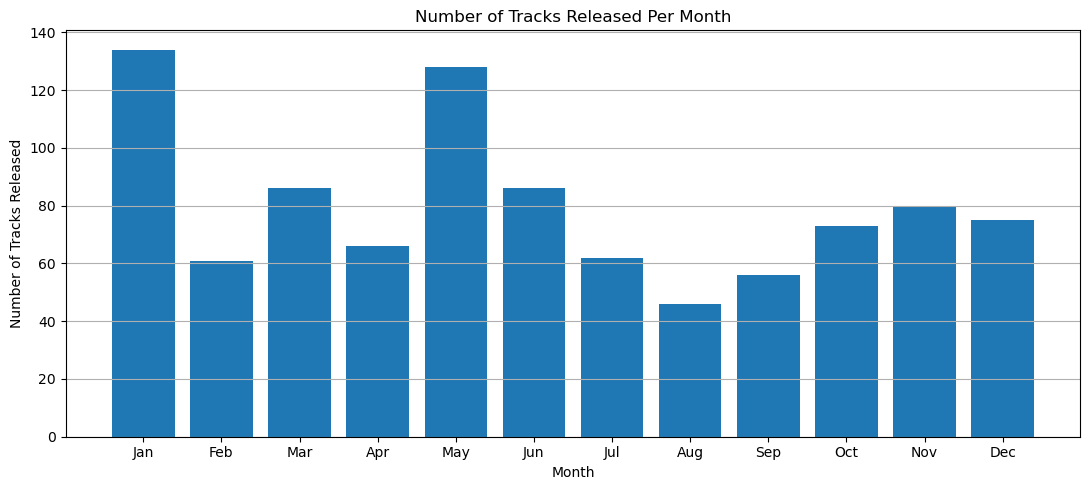

In [175]:
# For number of tracks per year
tracks_per_year = spotify_2023['released_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
tracks_per_year.plot(kind='bar')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# For number of tracks per month
tracks_per_month = spotify_2023['released_month'].value_counts().sort_index()

plt.figure(figsize=(11, 5))
plt.bar(tracks_per_month.index, tracks_per_month.values)
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

most_releases_month = tracks_per_month.idxmax() # max index
most_releases_count = tracks_per_month.max() # max release count

#### Explanation (Number of tracks yearly)
In 2022, the year with the highest number of tracks released. The possible cause of this is the steady recovery due to the COVID-19 Pandemic, meaning more artists have the chance to resume producing music tracks in music studios, this can also be attributed to the fact that digital streaming platforms are becoming popular, especially with TikTok and YouTube have promoted dance video trends with corresponding tracks that are part of the 2022 trends. 

#### Explanation (Number of tracks monthly)

January and May have the most tracks released. January can be attributed to the fact that it is a new year, and after the holiday break. This means that listeners look for more music and are intrigued by the fact that possibly new, innovative music can be released and be pleasing to their ears, and also the fact that the music tracks aren't as saturated as compared to later on the year. May is sometime during the summer, meaning a lot of people have time on their hands to listen to other music. 

# Genre and Music Characteristics

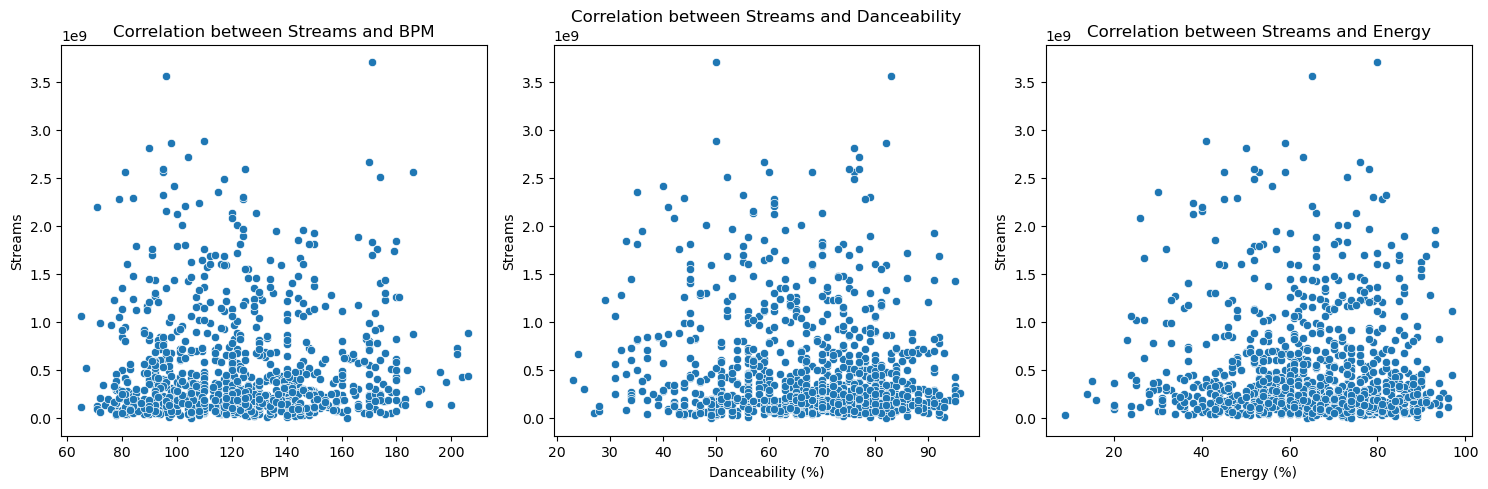

In [204]:
plt.figure(figsize=(15, 5))

# Streams and BPM
plt.subplot(1, 3, 1)
sns.scatterplot(x='bpm', y='streams', data=spotify_2023)
plt.title('Correlation between Streams and BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')

# Streams and danceability
plt.subplot(1, 3, 2)
sns.scatterplot(x='danceability_%', y='streams', data=spotify_2023)
plt.title('Correlation between Streams and Danceability')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')

# Streams and energy
plt.subplot(1, 3, 3)
sns.scatterplot(x='energy_%', y='streams', data=spotify_2023)
plt.title('Correlation between Streams and Energy')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')

plt.tight_layout()
plt.show()

#### Explanation (Correlation between Streams and BPM)
There seems to be no clear trend or linear correlation between the number of streams and BPM (beats per minute). This means that BPM is not a strong indicator of the popularity of the tracks. Another additional insight is that the BPMs of the songs can indicate the feel and emotion of the song; generally, lower BPMs can mean that it is a moody song, but it is a general stereotype.

#### Explanation (Correlation between Streams and Danceability %)
There is a general trend that suggests that when the Danceability percentage increases, the number of streams tends to increase as well. However, it is not completely linear correlated, which also means that the Danceability percentage does not impact the number of streams per track. Another additional insight regarding the outlier is that the higher stream counts but the much lower Danceability percentage strays away from the general trend.

#### Explanation (Correlation between Streams and Energy %)
Similar to the correlation between the number of streams and danceability %, the general trend is that if the energy % increases, the number of streams also increases. But in this case, it is much weaker compared to the correlation between streams and danceability %.

#### Which attribute influences the number of streams the most?
Based on the scatter plots, it seems like Danceability % influences the number of streams the most.


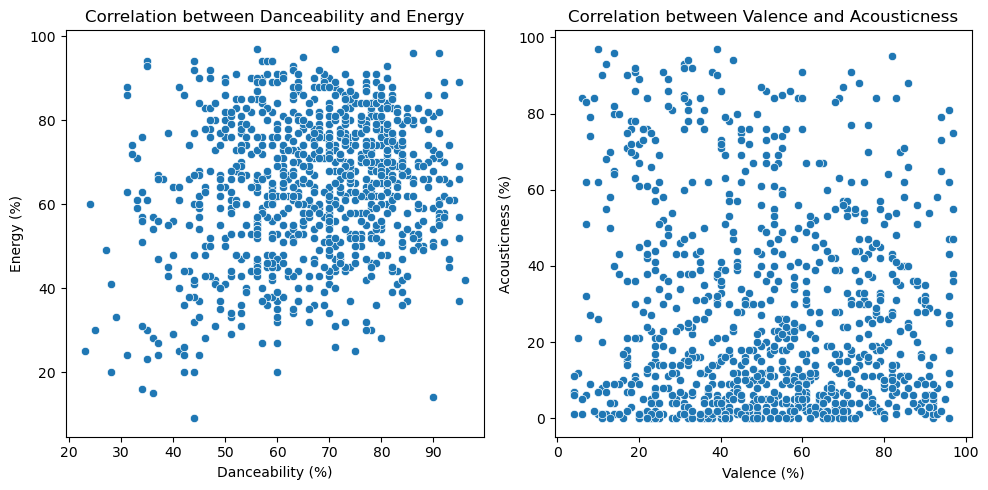

In [202]:
plt.figure(figsize=(10, 5))
# Danceability and Energy
plt.subplot(1, 2, 1)
sns.scatterplot(x='danceability_%', y='energy_%', data=spotify_2023)
plt.title('Correlation between Danceability and Energy')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')

# Valence and Acousticness
plt.subplot(1, 2, 2)
sns.scatterplot(x='valence_%', y='acousticness_%', data=spotify_2023)
plt.title('Correlation between Valence and Acousticness')
plt.xlabel('Valence (%)')
plt.ylabel('Acousticness (%)')

plt.tight_layout()
plt.show()

#### Explanation (Correlation between Danceability and Energy)
Based on the scatter plot, there is a positive correlation between the danceability and energy of a track. However, there are some tracks that do stray away from the general trend, so it is not a perfect correlation.

#### Explanation (Correlation between Valence and Acousticness)
There seems to be no correlation between the valence and acousticness of a track. Since the points are scattered across the plot without a clear trend. 

# Platform Popularity

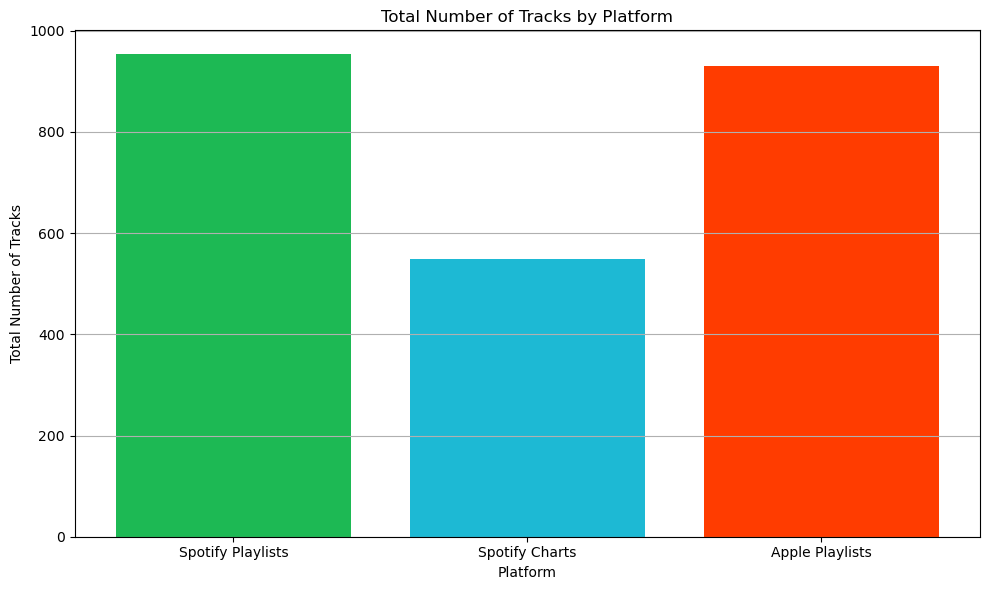

In [245]:
# Make sure the column is numerical, convert non-number to numeric
spotify_2023['in_spotify_playlists'] = pd.to_numeric(spotify_2023['in_spotify_playlists'], errors='coerce')
spotify_2023['in_spotify_charts'] = pd.to_numeric(spotify_2023['in_spotify_charts'], errors='coerce')
spotify_2023['in_apple_playlists'] = pd.to_numeric(spotify_2023['in_apple_playlists'], errors='coerce')

# This counts the number of tracks in their respective platforms
spotify_playlists_counts = spotify_2023['in_spotify_playlists'].value_counts()
spotify_charts_counts = spotify_2023['in_spotify_charts'].value_counts()
apple_playlists_counts = spotify_2023['in_apple_playlists'].value_counts()

# This whole function determines only the tracks that are in their respective platforms, meaning the tracks with 0 values in their respective columns are not considered
spotify_playlists_total = spotify_playlists_counts[spotify_playlists_counts.index > 0].sum()
spotify_charts_total = spotify_charts_counts[spotify_charts_counts.index > 0].sum()
apple_playlists_total = apple_playlists_counts[apple_playlists_counts.index > 0].sum()

# Set the variables for the data plot
platforms = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']
totals = [spotify_playlists_total, spotify_charts_total, apple_playlists_total]

# Plot the datas
plt.figure(figsize=(10, 6))
plt.bar(platforms, totals, color=['#1DB954', '#1DB9D4', '#FF3C00'])
plt.title('Total Number of Tracks by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Number of Tracks')
plt.xticks()
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

#### Explanation
Based on the plot above, Spotify Playlists has the most popular tracks, Apple Playlists a close second, and Spotify Charts at third with less than 600 popular tracks. This whole plot shows the number of tracks that the three platforms have. In the excel sheet, the 0 values in the respective platforms indicate that it is not available in the platform. 

# Advanced Analysis

<Figure size 640x480 with 0 Axes>

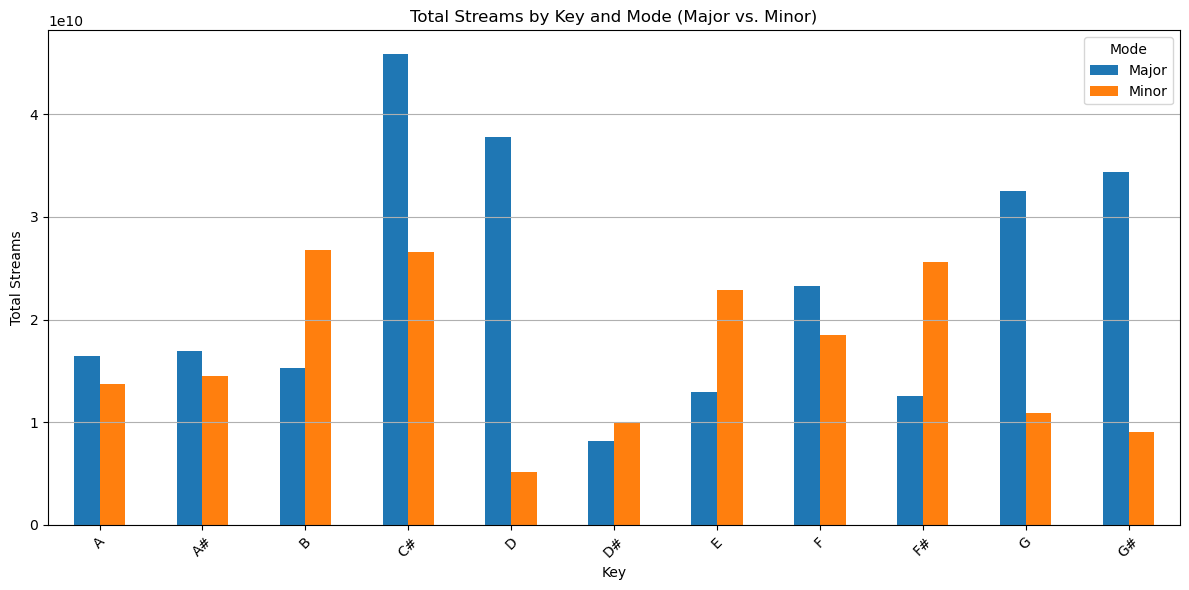

In [371]:
streams_by_key_mode = spotify_2023.groupby(['key', 'mode'], observed=False)['streams'].sum().unstack()

# Create a bar plot for total streams
plt.figure()
streams_by_key_mode.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Key')
plt.ylabel('Total Streams')
plt.title('Total Streams by Key and Mode (Major vs. Minor)')
plt.xticks(rotation=45)
plt.legend(title='Mode')
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

#### Explanation
Based on the streams data, the total number of streams by key and mode (major and minor) is in the key of C# Major and B Minor. Songs in the key of C# Major tend to be upbeat or have a happy tone/sound to it. But it does not mean that all C# Major songs are upbeat, but it tends to be on that general trend. Same goes for B Minor, as they go for a more "minor" sound, The use of Bm (B minor) chords in songs are definitely used for more moody and emotional songs.

In [331]:
# Group by artist name to count the presence in Spotify playlists and Spotify charts respectively
artist_playlists = spotify_2023.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()
artist_charts = spotify_2023.groupby('artist(s)_name')['in_spotify_charts'].sum().reset_index()

# Merge the two DataFrames on artist name
artist_summary = pd.merge(artist_playlists, artist_charts, on='artist(s)_name', how='outer')

# Fill any missing values with 0 and convert counts to integers
artist_summary = artist_summary.fillna(0)
artist_summary['in_spotify_playlists'] = artist_summary['in_spotify_playlists'].astype(int)
artist_summary['in_spotify_charts'] = artist_summary['in_spotify_charts'].astype(int)

# Sort by chart counts and then playlist counts, both in descending order
artist_summary = artist_summary.sort_values(by=['in_spotify_charts', 'in_spotify_playlists'], ascending=False)

# Display the top 10 artists
top_artists = artist_summary.head(10)
top_artists

,artist(s)_name,in_spotify_playlists,in_spotify_charts
558,Taylor Swift,132974,542
43,Bad Bunny,51317,268
25,Arctic Monkeys,84016,190
223,Harry Styles,110026,185
572,The Weeknd,144053,180
418,NewJeans,5127,168
179,Feid,14276,165
171,Eminem,87331,152
285,Karol G,9265,149
326,"Latto, Jung Kook",553,147
